In [25]:
import pandas as pd 
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
import pydicom
import os
from pydicom.pixel_data_handlers.util import apply_voi_lut
import matplotlib.patches as patches
from matplotlib import image
from matplotlib import pyplot


In [48]:
df = pd.read_pickle("/home/single1/BACKUP/tintrung/brainmri/trungdc/dataset.pkl")
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', 500)

df.head()
df[df.DicomFileName == "1.2.840.113619.2.410.15512023.5814788.14931.1578875811.603.dcm"]

,SliceIndex,Bbox,Tag,LesionIndex,DicomFileName,SeriesInstanceUID_x,StudyInstanceUID_x,SeriesNumberInstances,SeriesPlane,SeriesLabelMerge,StudyInstanceUID_y,SeriesInstanceUID_y,SeriesDescription,Rows,Columns,SliceThickness,PixelSpacing,SpacingBetweenSlices,SliceLocation,SmallestImagePixelValue,LargestImagePixelValue,WindowCenter,WindowWidth,ImagePositionPatient,ImageOrientationPatient,RepetitionTime,EchoTime,PatientPosition
955,60,"[273.651832018653, 255.9883808948799, 42.464551891855024, 46.104370679102004]",Mass_Nodule,0,1.2.840.113619.2.410.15512023.5814788.14931.1578875811.603.dcm,1.2.840.113619.2.410.15512023.5814788.19174.1578875699.467,1.2.840.113619.6.410.233883733650347072299420381528089101654,224,axial,t1,1.2.840.113619.6.410.233883733650347072299420381528089101654,1.2.840.113619.2.410.15512023.5814788.19174.1578875699.467,T1W 3D +C,512,512,1.6,"[0.5078, 0.5078]",0.800001,-78.479523,0,9773,4886.0,9773.0,"[-123.654, -116.668, -73.7126]","[0.999846, 0.00230713, -0.0173931, -0.00264364, 0.999809, -0.0193475]",8.636,4.044,HFS


In [12]:
!python detect.py --weights /home/single1/BACKUP/tintrung/brain-mri-tumor-txt-labels-2-classes/yolov5/runs/train/exp7/weights/best.pt --img 512 --conf 0.25 --source data/images/1.2.840.113619.2.408.14196467.2124406.14390.1589844917.79.png

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=512, iou_thres=0.45, name='exp', nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='data/images/1.2.840.113619.2.408.14196467.2124406.14390.1589844917.79.png', update=False, view_img=False, weights=['/home/single1/BACKUP/tintrung/brain-mri-tumor-txt-labels-2-classes/yolov5/runs/train/exp7/weights/best.pt'])
YOLOv5 🚀 v4.0-180-g1148e2e torch 1.7.1 CUDA:0 (GeForce RTX 2080 Ti, 11011.0625MB)

Fusing layers... 
Model Summary: 224 layers, 7056607 parameters, 0 gradients, 16.3 GFLOPS
image 1/1 /home/single1/BACKUP/tintrung/brain-mri-tumor-txt-labels-2-classes/yolov5/data/images/1.2.840.113619.2.408.14196467.2124406.14390.1589844917.79.png: 512x512 1 Mass_Nodule, Done. (0.007s)
Results saved to runs/detect/exp2
Done. (0.024s)


In [17]:
def read_xray(path, voi_lut = True, fix_monochrome = True):
    dicom = pydicom.read_file(path)
    
    # VOI LUT (if available by DICOM device) is used to transform raw DICOM data to "human-friendly" view
    if voi_lut:
        data = apply_voi_lut(dicom.pixel_array, dicom)
    else:
        data = dicom.pixel_array
               
    # depending on this value, X-ray may look inverted - fix that:
    if fix_monochrome and dicom.PhotometricInterpretation == "MONOCHROME1":
        data = np.amax(data) - data
        
    data = data - np.min(data)
    data = data / np.max(data)
    data = (data * 255).astype(np.uint8)
        
    return data
# df[df.SeriesUID == cur_test]

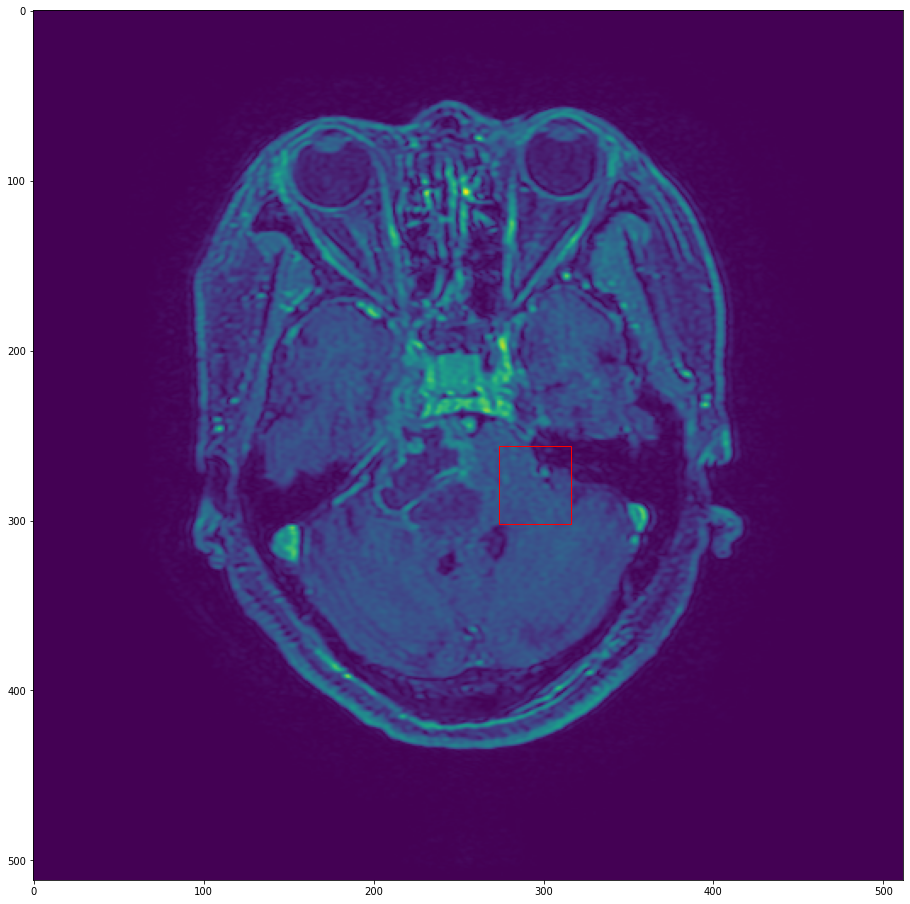

In [49]:
img = image.imread("\home\single1\BACKUP\tintrung\brain-mri-tumor-txt-labels-2-classes\images1.2.840.113619.2.410.15512023.5814788.14931.1578875811.603.png")
bbox = list(df[df.DicomFileName == "1.2.840.113619.2.410.15512023.5814788.14931.1578875811.603.dcm"]["Bbox"])[0]

fif, ax  = fig, _ = plt.subplots(figsize=(16, 16))
rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=1, edgecolor='r', facecolor='none')
ax.imshow(img)
ax.add_patch(rect)
